In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
air_quality = pd.read_csv("../data/processed/air_quality_transformed.csv")
water_quality = pd.read_csv("../data/processed/water_quality_transformed.csv")
deforestation = pd.read_csv("../data/processed/deforestation_transformed.csv")

In [3]:
print("\nModel 1: Predicting Air Quality Levels")
if 'Data Value' in air_quality.columns:
    X_air = air_quality[['Year', 'Data Value Normalized']].dropna()
    y_air = air_quality['Data Value']


Model 1: Predicting Air Quality Levels


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X_air, y_air, test_size=0.2, random_state=42)

In [5]:
air_model = RandomForestRegressor(random_state=42)
air_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [6]:
y_pred = air_model.predict(X_test)

In [7]:
mse_air = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error for Air Quality Prediction: {mse_air}")

Mean Squared Error for Air Quality Prediction: 0.6391228165926728


In [17]:
print("\nModel 2: Predicting High Water Temperature")


Model 2: Predicting High Water Temperature


In [20]:
combined = water_quality[['pH_Filled', 'Year', 'High Temp Flag']].dropna()
X_water = combined[['pH_Filled', 'Year']]
y_water = combined['High Temp Flag'].astype(int)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_water, y_water, test_size=0.2, random_state=42)

In [23]:
water_model = RandomForestClassifier(random_state=42)
water_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [24]:
y_pred = water_model.predict(X_test)

In [25]:
print("Classification Report for High Water Temperature Prediction:")
print(classification_report(y_test, y_pred))

Classification Report for High Water Temperature Prediction:
              precision    recall  f1-score   support

           0       0.77      0.93      0.84       220
           1       0.40      0.14      0.21        71

    accuracy                           0.74       291
   macro avg       0.59      0.54      0.53       291
weighted avg       0.68      0.74      0.69       291



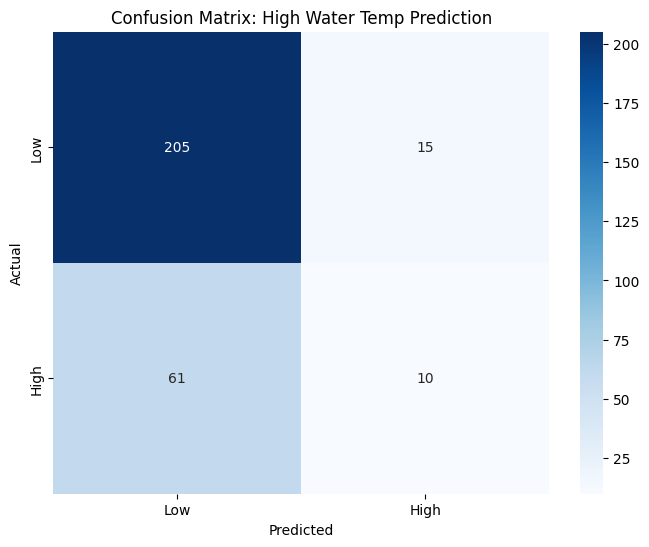

In [26]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Low", "High"], yticklabels=["Low", "High"])
plt.title("Confusion Matrix: High Water Temp Prediction")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [27]:
print("\nModel 3: Predicting Deforestation Trend Category")
if 'trend_category' in deforestation.columns:
    X_deforestation = deforestation[['forests_2000', 'forests_2020', 'forest_change_percentage']].dropna()
    y_deforestation = deforestation['trend_category']


Model 3: Predicting Deforestation Trend Category


In [28]:
y_deforestation = y_deforestation.map({'Positive': 1, 'Negative': 0})

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_deforestation, y_deforestation, test_size=0.2, random_state=42)

In [30]:
deforestation_model = RandomForestClassifier(random_state=42)
deforestation_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [31]:
y_pred = deforestation_model.predict(X_test)

In [32]:
print("Classification Report for Deforestation Trend Prediction:")
print(classification_report(y_test, y_pred))

Classification Report for Deforestation Trend Prediction:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        15

    accuracy                           1.00        46
   macro avg       1.00      1.00      1.00        46
weighted avg       1.00      1.00      1.00        46



In [33]:
feature_importance = pd.DataFrame({
        'Feature': X_deforestation.columns,
        'Importance': deforestation_model.feature_importances_
    }).sort_values(by='Importance', ascending=False)

In [34]:
print("\nFeature Importance:")
print(feature_importance)


Feature Importance:
                    Feature  Importance
2  forest_change_percentage    0.843825
1              forests_2020    0.080499
0              forests_2000    0.075676


/var/folders/lf/yzk5th4d3pl2wgt5ylqgv7bw0000gn/T/ipykernel_48700/302342310.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')


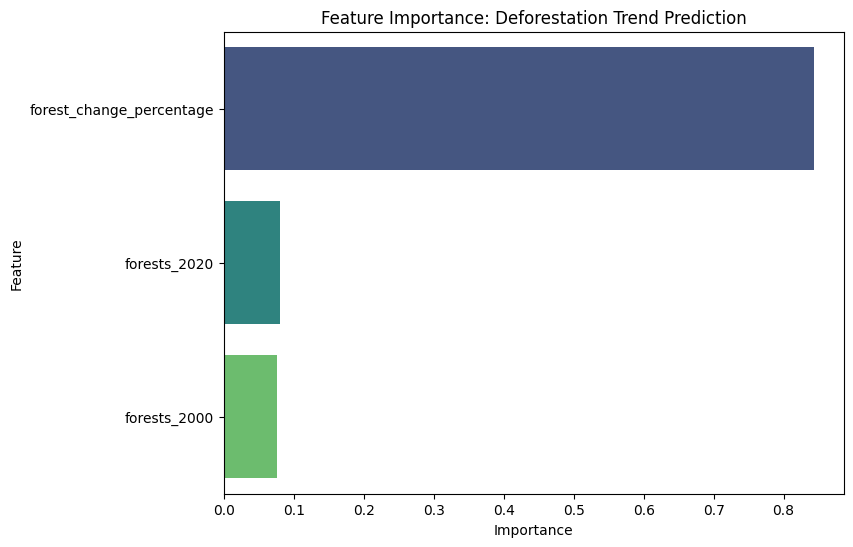

In [35]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')
plt.title("Feature Importance: Deforestation Trend Prediction")
plt.show()